![BTS](https://github.com/vfp1/bts-mbds-data-science-foundations-2019/blob/master/sessions/img/Logo-BTS.jpg?raw=1)

# WEEK 2: Assignements

### Victor F. Pajuelo Madrigal <victor.pajuelo@bts.tech> - Data Science Foundations (2019-10-10)

Open this notebook in Google Colaboratory: [![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/vfp1/bts-mbds-data-science-foundations-2019/blob/master/sessions/DSF_WEEK_2_EXERCISES.ipynb)

# Exercise 1: getting around GIT [OPTIONAL]

You will be provided with further slides on next Tuesday class (15/10/2019). Meanwhile you can try to do the following:

* Create a GitHub account
* Fork the [repository](https://github.com/vfp1/bts-mbds-data-science-foundations-2019) from the course
* Clone the repository in your own computer using `git clone`
* Create a folder within `/sessions` where you will be creating your own notebooks. Since we are using notebooks, it is better that you leave the nootebooks from the course untouched, and that you rather create a copy of them in the  `/sessions` folder where you can edit them. Trust me, it will save you a lot of **merge conflict** problems.
* Sync your fork to the remote origin (the original repo of the course) so you can update it with the new notebooks that I will be adding. Follow [this tutorial](https://help.github.com/en/articles/syncing-a-fork).
* Return this exercise by commiting the whole notebook in your own git and pass the url to me

# Exercise 2: more bikes [OBLIGATORY]

Given [this](https://github.com/vfp1/bts-mbds-data-science-foundations-2019/raw/master/sessions/data/Fremont_Bridge_Hourly_Bicycle_Counts_by_Month_October_2012_to_present.csv) dataset:

* Open the dataset using Pandas
* Display the DataFrame
* Describe the DataFrame, can we already see some trends in regards to volume of bikes per region?
* Reply to the following questions (either by plotting the graph and summarizing the values):

    * In each one of the years from the dataset. Which is the month with the highest number of bikes?
        * Plot each year with the number of bikes to also see it visually.
    * In Total, when are the hours with the least amount of riders? Take into consideration all days of the week.
        * Plot the hours with the average amount of riders.
    * In the current year, which is the best route to bike with less people? Use the average of bikers during the whole year.
        * Plot the bikers per hour using yearly average
        * When is best to ride with less people between 10 to 15 in weekdays using the average of 2019?
        * Plot the amount of bikers during those hours on weekdays

In [0]:
import pandas as pd
from datetime import datetime
from dateutil import parser
import numpy as np
my_file = pd.read_csv("https://raw.githubusercontent.com/vfp1/bts-mbds-data-science-foundations-2019/master/sessions/data/Fremont_Bridge_Hourly_Bicycle_Counts_by_Month_October_2012_to_present.csv", index_col="Date", parse_dates=True)
my_file.head()

,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,
2015-02-24 02:00:00,3.0,3.0
2019-01-01 00:00:00,0.0,9.0
2019-01-01 01:00:00,2.0,22.0
2016-02-15 00:00:00,3.0,3.0
2019-01-01 02:00:00,1.0,11.0


In [0]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [0]:
my_file.describe()

,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
count,61287.000000,61287.000000
mean,52.894790,61.444874
std,67.815951,89.875981
min,0.000000,0.000000
25%,7.000000,7.000000
50%,29.000000,30.000000
75%,71.000000,74.000000
max,698.000000,850.000000


It is possible to see that on average, more bikers tend to use the west sidewalk

In [0]:
month_year = my_file.groupby([my_file.index.year, my_file.index.month]).mean()
month_year

Fremont Bridge East Sidewalk  Fremont Bridge West Sidewalk
Date Date                                                            
2012 10                       48.511494                     45.877874
     11                       36.197222                     34.145833
     12                       25.010753                     23.872312
2013 1                        30.793011                     29.534946
     2                        38.538690                     35.906250
     3                        46.294355                     42.534946
     4                        51.809722                     48.187500
     5                        76.393817                     69.538978
     6                        71.642061                     66.630919
     7                        80.662634                     77.904570
     8                        71.504032                     69.018817
     9                        57.880556                     54.243056
     10                       56.704301                     52.639785
     11                       42.376389                     39.943056
     12                       30.344086                     28.194892
2014 1                        41.631720                     38.842742
     2                        35.842262                     34.135417
     3                        44.212651                     41.243607
     4                        62.304167                     58.327778
     5                        82.610215                     76.857527
     6                        78.212500                     75.825000
     7                        82.217742                     79.971774
     8                        75.591398                     75.604839
     9                        70.893056                     64.604167
     10                       60.049731                     51.756720
     11                       38.837500                     40.315278
     12                       31.840054                     33.357527
2015 1                        48.056452                     33.435484
     2                        48.796131                     38.494048
     3                        46.547779                     49.204576
...                                 ...                           ...
2017 4                        42.129167                     52.888889
     5                        64.875000                     81.750000
     6                        65.031944                     84.691667
     7                        68.512097                     91.305108
     8                        66.891129                     94.651882
     9                        56.758333                     77.266667
     10                       48.978495                     69.493280
     11                       32.558333                     47.558333
     12                       25.465054                     36.177419
2018 1                        32.095430                     46.655914
     2                        30.808036                     44.604167
     3                        43.061911                     60.954240
     4                        45.823611                     65.213889
     5                        72.836022                    101.643817
     6                        63.454167                     93.691667
     7                        70.146505                    101.920699
     8                        59.189516                     91.091398
     9                        53.852778                     79.816667
     10                       48.348118                     73.939516
     11                       37.073611                     57.969444
     12                       24.924731                     38.168011
2019 1                        38.584677                     59.376344
     2                        20.559524                     33.159226
     3                        46.120968                     68.740591
     4               

Text(0.5, 1.0, '2012')

Text(0.5, 1.0, '2013')

Text(0.5, 1.0, '2014')

Text(0.5, 1.0, '2015')

Text(0.5, 1.0, '2016')

Text(0.5, 1.0, '2017')

Text(0.5, 1.0, '2018')

Text(0.5, 1.0, '2019')

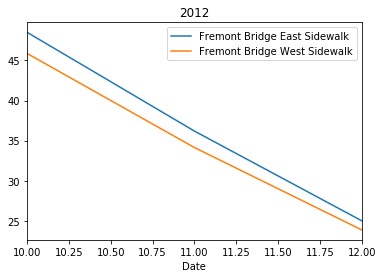

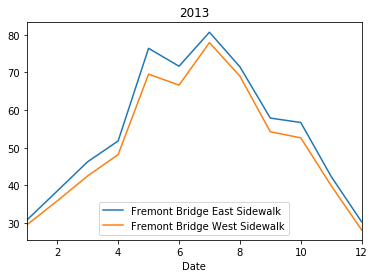

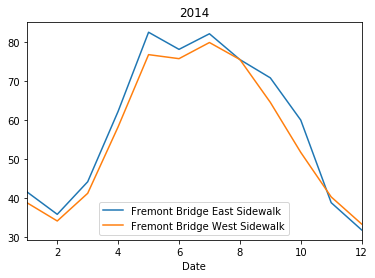

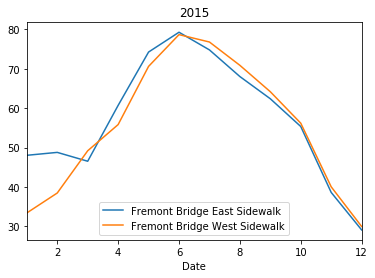

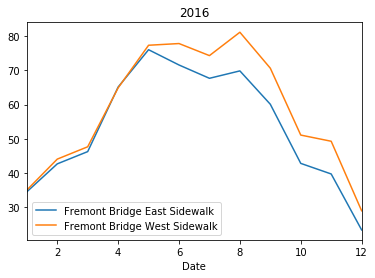

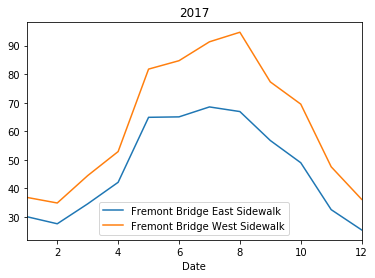

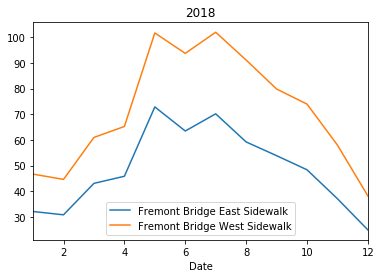

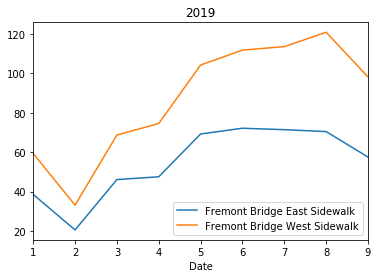

In [0]:
month_year.loc[2012].plot().set_title("2012")
month_year.loc[2013].plot().set_title("2013")
month_year.loc[2014].plot().set_title("2014")
month_year.loc[2015].plot().set_title("2015")
month_year.loc[2016].plot().set_title("2016")
month_year.loc[2017].plot().set_title("2017")
month_year.loc[2018].plot().set_title("2018")
month_year.loc[2019].plot().set_title("2019")

In [0]:
hour = my_file.groupby([my_file.index.time]).mean()
hour
hour.min()

,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
00:00:00,5.054816,6.795223
01:00:00,2.825764,3.447925
02:00:00,2.003923,2.125539
03:00:00,1.567737,1.469851
04:00:00,3.551292,3.142913
05:00:00,16.352388,10.074393
06:00:00,56.413469,36.033673
07:00:00,147.527408,85.638998
08:00:00,198.488254,131.081441
09:00:00,106.688210,85.665492


Fremont Bridge East Sidewalk    1.567737
Fremont Bridge West Sidewalk    1.469851
dtype: float64

In [0]:
hour_west = np.where(hour["Fremont Bridge East Sidewalk"] == hour["Fremont Bridge East Sidewalk"].min())
hour.iloc[hour_west]
hour_east = np.where(hour["Fremont Bridge West Sidewalk"] == hour["Fremont Bridge West Sidewalk"].min())
hour.iloc[hour_east]

,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
03:00:00,1.567737,1.469851


,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
03:00:00,1.567737,1.469851


In [0]:
hour

# Exercise 3: SQLite and Pandas [OBLIGATORY]

Download [this Sqlite database](https://github.com/vfp1/bts-mbds-data-science-foundations-2019/raw/master/sessions/data/flights.db)

You can either use SQLite database entirely or load the SQL query in Pandas to reply to the following questions:

*   Which is the highest city that as an airport?
*   And which is the lowest city that as an airport?
*   Retrieve the timezones and generate a dataframe with the timezones and the amount of airports in them. Plot it as a histogram as well.
*   Which country has more airlines? And which one has less?
*   Which city has the most outgoing destinations? And the least?
*   And which city has the most incoming destinations? And the least?



In [0]:
import sqlite3

def create_connect_database(db_name):
    """Opens connection or creates it if it is not existent"""
    connection = sqlite3.connect(db_name)
    cursor = connection.cursor()
    
    return connection, cursor

def commit_close(conn, c, close_connection=True):
    """Commits to connection DB and closes it if close is True"""
    conn.commit()

    if close_connection is True:
        c.close()
        conn.close()
    elif close_connection is False:
        pass

In [15]:
import pandas as pd
import sqlite3

conn, cursor = create_connect_database("flights (1).db")

query = """SELECT city, altitude FROM airports
ORDER BY altitude DESC;"""

df = pd.read_sql_query(query, conn)
df

,city,altitude
0,Dauphin,999
1,Akola,999
2,Flin Flon,997
3,Autun,997
4,Tiputini,997
5,Toccoa,996
6,Katowice,995
7,Angola,995
8,Diffa,994
9,Vilshofen,991


In [19]:
import pandas as pd
import sqlite3

conn, cursor = create_connect_database("flights (1).db")

query = """SELECT timezone, COUNT() FROM airports
GROUP BY timezone;"""

df = pd.read_sql_query(query, conn)
df

,timezone,COUNT()
0,Africa/Abidjan,7
1,Africa/Accra,6
2,Africa/Addis_Ababa,31
3,Africa/Algiers,44
4,Africa/Asmera,4
5,Africa/Bamako,8
6,Africa/Bangui,3
7,Africa/Banjul,1
8,Africa/Bissau,2
9,Africa/Blantyre,8


In [21]:
import pandas as pd
import sqlite3

conn, cursor = create_connect_database("flights (1).db")

query = """SELECT country, COUNT() FROM airports
GROUP BY country
ORDER BY COUNT() DESC;"""

df = pd.read_sql_query(query, conn)
df

,country,COUNT()
0,United States,1697
1,Canada,435
2,Germany,321
3,Australia,263
4,Russia,249
5,France,233
6,China,219
7,Brazil,213
8,United Kingdom,210
9,India,140


In [24]:
import pandas as pd
import sqlite3

conn, cursor = create_connect_database("flights (1).db")

query = """SELECT 
CAST(source_air.city AS TEXT) AS source_city, 
CAST(destination_air.city AS TEXT) AS destination_city 
FROM routes 
INNER JOIN airports source_air 
  ON source_air.id = routes.source_id 
INNER JOIN airports destination_air 
  ON destination_air.id = routes.dest_id;"""

df = pd.read_sql_query(query, conn)
df

,source_city,destination_city
0,Sochi,Kazan
1,Astrakhan,Kazan
2,Astrakhan,Mineralnye Vody
3,Chelyabinsk,Kazan
4,Chelyabinsk,Novosibirsk
5,Moscow,Kazan
6,Moscow,Nizhnekamsk
7,Moscow,Bugulma
8,Belgorod,Kaliningrad
9,Belgorod,Kazan


In [25]:
df['source_city'].value_counts().sort_values(ascending=False)

London                  1232
Atlanta                  915
Paris                    725
Chicago                  697
New York                 614
Shanghai                 612
Moscow                   606
Beijing                  601
Istanbul                 501
Frankfurt                497
Los Angeles              492
Dallas-Fort Worth        469
Amsterdam                453
Tokyo                    442
Seoul                    409
Singapore                408
Dubai                    403
Barcelona                402
Bangkok                  393
Washington               392
Rome                     381
Munich                   368
Miami                    368
Denver                   361
Hong Kong                355
Guangzhou                334
Toronto                  333
Madrid                   330
Chengdu                  322
Houston                  322
                        ... 
Bukoba                     1
Tottori                    1
Tiaret                     1
Kamuela       

In [26]:
df['destination_city'].value_counts().sort_values(ascending=False)

London                 1224
Atlanta                 911
Paris                   720
Chicago                 682
Shanghai                616
New York                613
Moscow                  606
Beijing                 600
Istanbul                504
Los Angeles             498
Frankfurt               493
Dallas-Fort Worth       467
Amsterdam               450
Tokyo                   446
Singapore               412
Seoul                   409
Barcelona               403
Dubai                   397
Bangkok                 397
Washington              382
Rome                    381
Denver                  374
Miami                   366
Munich                  360
Hong Kong               355
Guangzhou               332
Toronto                 331
Madrid                  331
Chengdu                 321
Brussels                315
                       ... 
Muang Xay                 1
Rockland                  1
Ipiales                   1
Rio Hondo                 1
Mayaguez            